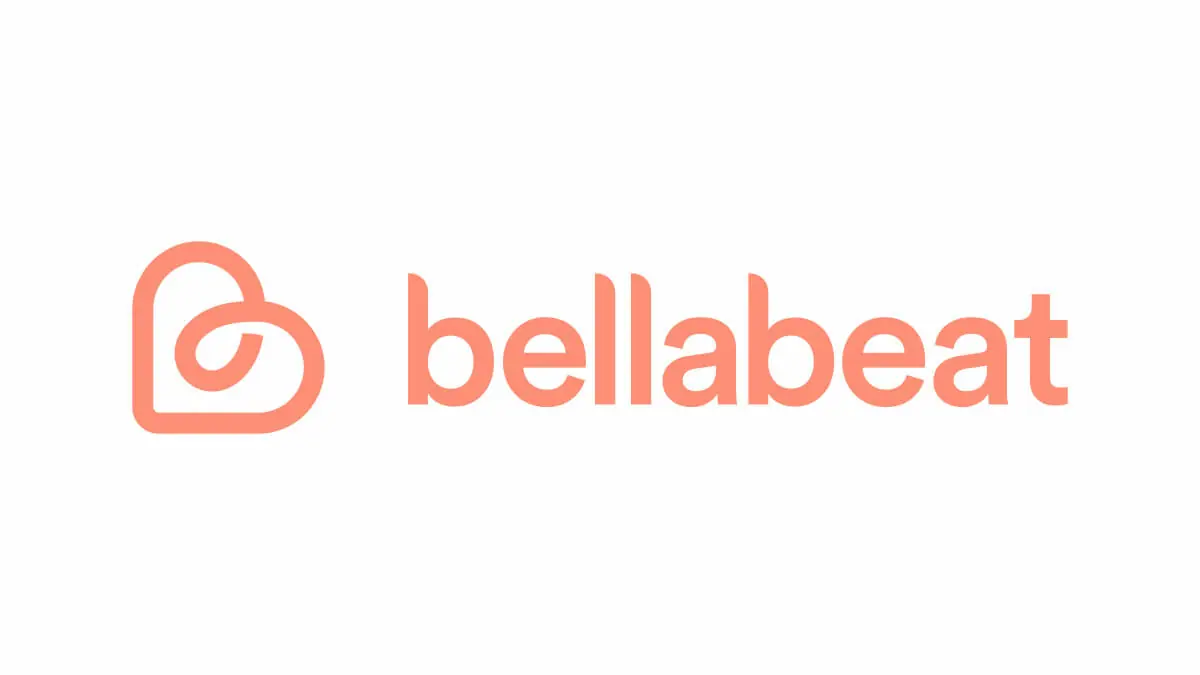

## Introduction <a class="anchor"  id="intro"></a>

#### Industry focus:
Health-focused products for women

#### About the company:
Founded in 2013, [Bellabeat](https://bellabeat.com/) is a high-tech company that manufactures health-focused smart products that empowers women with knowledge about their own health and habits.

#### Bellabeat products:
* **[Bellabeat app](https://apps.apple.com/us/app/bellabeat-wellness-coach/id1005052173)**: An app that offers users health data concerning activity, sleep, stress, menstrual cycle, and mindfulness habits, empowering them to gain insights into their current behaviors and make informed health decisions, while also serving as a gateway to their range of smart wellness products
* **[Leaf](https://bellabeat.com/product/leaf-urban/)**: A classic wellness tracker, which can be worn as a bracelet, necklace, or clip, that connects to the Bellabeat app to monitor activity, sleep, and stress.
* **[Time](https://bellabeat.com/product/time/)**: A wellness watch that seamlessly blends the timeless aesthetic of a classic timepiece with smart technology, enabling users to track activity, sleep, and stress while connecting to the Bellabeat app for daily wellness insights.
* **[Spring](https://bellabeat.com/product/spring/)**: A water bottle that utilizes smart technology to track daily water intake, ensuring optimal hydration levels throughout the day, and connects seamlessly to the Bellabeat app for easy monitoring of hydration levels.
* **[Ivy+](https://bellabeat.com/product/ivy-plus/?attribute_pa_style=violet)**: A stylish smart jewelry piece that tracks activity, monitors sleep, and provides personalized wellness insights for users seeking a blend of fashion and health technology.
* **Bellabeat membership**: A subscription-based membership program, granting users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health, beauty, and mindfulness tailored to their lifestyle and goals.

#### Customer portfolio:

These are some assumptions about Bellabeat's target demographic based on their website.
* **Gender:** Female
* **Age**: Teens - Middle-Aged Adults
* **Location**: North America
* **Socio-economic status**: Middle and upper-class working individuals with disposable incomes
* **Needs**: Personalized health monitoring, wellness management, and fashionable accessories that seamlessly integrate technology

In this case study, I will analyze smart device data to gain insights on how consumers are using their smart devices and apply it to one of Bellabeat's products in order to help guide marketing strategy for the company. Based on [global data](https://www.businessofapps.com/data/health-app-market/), health applications have been on the rise since the 2020 pandemic, therefore I will concentrate on the **Bellabeat app**. To achieve this, I will follow the the steps of the data life cycle: ***ask, prepare, process, analyze, share, and act***. 

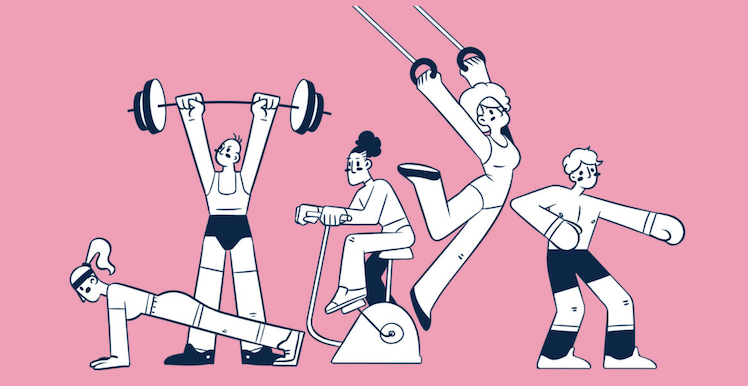

## Ask <a class="anchor"  id="ask"></a>

#### Key Stakeholders <a class="anchor"  id="stakeholders"></a>
Urška Sršen and Sando Mur (the cofounders), Bellabeat marketing analytics team

#### Business task <a class="anchor"  id="business_task"></a>
Discover trends, patterns, and correlations in users' smart device usage behavior to pinpoint areas for enhancement within the Bellabeat app and inform marketing strategies.

#### Business questions <a class="anchor"  id="business_questions"></a>
* What are some trends in smart device usage?
* How could these trends apply to Bellabeat customers?
* How could these trends help influence Bellabeat marketing strategy?

## Prepare <a class="anchor"  id="prepare"></a>

#### Examine datasets <a class="anchor"  id="examine_datasets"></a>
I'll focus on analyzing a subset of the Fitbit user data at the daily and hourly level, rather than minute or second granularity, for practicality and relevance in identifying usage trends and informing marketing tactics for Bellabeat's app.

In [ ]:
# Load libraries
library("tidyverse") 
library("lubridate") # for dates
library("janitor") # for cleaning 
library("skimr") # for summarization 
library("ggplot2") # for visualization
library("dplyr") # for manipulation

In [ ]:
# Import datasets and assign new names 
daily_activity <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_calories <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
daily_intensity <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
daily_steps <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
daily_sleep <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight_log <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
hrs_calories <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hrs_intensity <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hrs_steps <- read_csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")

##### Get preview of main dataset
Use summary functions to get to know your data.

In [ ]:
# Preview first few rows 
head(daily_activity)

In [ ]:
# View structure
str(daily_activity)

In [ ]:
# View column names
colnames(daily_activity)

In [ ]:
# View structure
str(hrs_calories)

##### Get to know the rest of the datasets
I'm looking at the primary dataset as well as the others here.   

In [ ]:
# Unique participants in each dataframe
n_distinct(daily_activity$Id)
n_distinct(daily_calories$Id)
n_distinct(daily_intensity$Id)
n_distinct(daily_steps$Id)
n_distinct(daily_sleep$Id)
n_distinct(weight_log$Id)
n_distinct(hrs_calories$Id)
n_distinct(hrs_intensity$Id)
n_distinct(hrs_steps$Id)

In [ ]:
# Observations in each dataframe
nrow(daily_activity)
nrow(daily_calories)
nrow(daily_intensity)
nrow(daily_steps)
nrow(daily_sleep)
nrow(weight_log)
nrow(hrs_calories)
nrow(hrs_intensity)
nrow(hrs_steps)

In [ ]:
# Check for null values
sum(is.na(daily_activity))
sum(is.na(daily_calories))
sum(is.na(daily_intensity))
sum(is.na(daily_steps))
sum(is.na(daily_sleep))
sum(is.na(weight_log))
sum(is.na(hrs_calories))
sum(is.na(hrs_intensity))
sum(is.na(hrs_steps))

I used Google Sheets to examine all the datasets further. Reviewing the other datasets revealed that all of them—aside from daily_sleep and weight_log—contain redundant data from the daily_activity dataset. I'm cross-referencing the columns to make sure to confirm this. I iteratively verified each column for alignment across datasets, changing the column names and accompanying dataset as needed to avoid writing separate code chunks.


In [ ]:
# Compare datasets
comparison_result <- all.equal(daily_activity$TotalSteps, daily_steps$StepTotal)

# Print result
if(comparison_result == TRUE) {
  print("Identical.")
} else {
  print("Not identical.")
}


Observations: 
* There are 33 respondents in every file except the daily_sleep and the weight_log dataset.
* 65 null values in the weight_log file. 

Decisions made: 
1. I've decided to remove the weight_log dataset from my analysis since there were only 8 participants who tracked their weight, and there was information missing from the data. The sample size is not large enough to make any conclusions.
2. Despite the having fewer respondents as well, I will include the daily_sleep dataset in my analysis due to its relevance and unique insights it offers into users' behaviors.
3. Since the daily_activity dataset contains all the relevant data needed for analysis, I will focus my analysis on it in conjunction with the daily_sleep dataset to reduce redundancy and improve workflow efficiency.

#### Data source <a class="anchor"  id="data_source"></a>
The datasets used for analysis was downloaded from the [Fitbit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit) that was made available through [Mobius](https://www.kaggle.com/arashnic) on Kaggle. These datasets were licensed under the CCO Public Domain, making it free to copy, modify, distribute, and perform the work without the need for permission. The data is provided by a third party, Amazon Mechanical Turk, and was generated by respondents through a distributed survey from March 12, 2016 through May 12, 2016. 

The dataset is arranged in both long and wide format into 18 CSV files. It includes data from 30 FitBit users who consented to share their personal tracker data, comprising of minute-level outputs for physical activity, heart rate, and sleep monitoring.

#### ROCCC Analysis <a class="anchor"  id="roccc"></a>
The purpose of this analysis is to evaluate sources for credibility and reliability.

**Reliablity: Low**
* Not representative of the [38 million active Fitbit users in 2024](https://www.businessofapps.com/data/fitbit-statistics/), as the data collected from only 30 participants.Even while the central limit theorem (CLT) states that a sample size of 30 is still valid, a bigger sample size would have been more optimal.
* There is just one month of data available, from April 12, 2016, to May 12, 2016, despite the survey being done from March 12 through May 12, 2016. Given that health and fitness fluctuate throughout a year, a longer time period might have produced more insightful results. 

**Original: Low**
* Data is provided by a third party called Amazon Mechanical Turk. Data from FitBit itself would have been more reliable. 

**Comprehensive: Medium**
* The majority of the data's characteristics, which includes activity, sleep, and steps, align with the Bellabeat business task of analyzing smart device usage trends. 
* Bellabeat targets women, thus knowing each user's gender would have been useful, but it isn't included in the dataset. 

**Current: Low**
* Data is outdated since it was collected in 2016, and the analysis is taking place in 2024. Technology advancements may have caused changes in user behavior over time. 

**Cited: High**
* The dataset is well-documented, with clear sources provided.

#### Limitations <a class="anchor"  id="limits"></a>
The limitations I've observed:
* Each person's ID number was the sole detail provided about them. Factors such as age, ethnicity, and socio-economic background was not collected. 
* The distance units were missing from the *dailyActivity* file. I would need to talk with the analytics team to get more details before making a conclusion. 
* Not all 30 participants were included in all of the datasets. 

## Process <a class="anchor"  id="process"></a>

After reviewing the data in Excel and identifying issues, I opted for **R programming** to address these problems. In this section, I will clean and transform the datasets to ensure they are ready for analysis.

#### Consistency change <a class="anchor"  id="consistency"></a>

To ensure consistency with the daily_activity dataset that only includes the date, I am separating the date and time components in the daily_sleep dataset to align with the formatting used in it.

In [ ]:
# Separate date and time in daily_sleep and rename SleepDay column
days_sleep <- separate(daily_sleep, SleepDay, into = c('ActivityDate', 'Time'), sep = ' ')
# Check work
head(days_sleep)

#### Format change <a class="anchor"  id="format"></a>
I will be converting the format of every dataset from character (chr) to the date/date-time datatype in order to perform time-based analysis.

In [ ]:
# Change to date format in daily_activity
daily_activity$ActivityDate <- mdy(daily_activity$ActivityDate)
# Check work
str(daily_activity)

In [ ]:
# Change to date format in days_sleep
days_sleep$ActivityDate <- mdy(days_sleep$ActivityDate)
# Check work
str(days_sleep)

In [ ]:
# Change to date format in hrs_calories
hrs_calories$ActivityHour <- mdy_hms(hrs_calories$ActivityHour)
hrs_calories$time <- format(hrs_calories$ActivityHour, format = "%H:%M:%S")
hrs_calories$date <- format(hrs_calories$ActivityHour, format = "%m:%d:%y")
# Check work
head(hrs_calories)

In [ ]:
# Change to date format in hrs_intensity
hrs_intensity$ActivityHour <- mdy_hms(hrs_intensity$ActivityHour)
hrs_intensity$time <- format(hrs_intensity$ActivityHour, format = "%H:%M:%S")
hrs_intensity$date <- format(hrs_intensity$ActivityHour, format = "%m:%d:%y")
# Check work
head(hrs_intensity)

In [ ]:
# Change to date format in hrs_steps
hrs_steps$ActivityHour <- mdy_hms(hrs_steps$ActivityHour)
hrs_steps$time <- format(hrs_steps$ActivityHour, format = "%H:%M:%S")
hrs_steps$date <- format(hrs_steps$ActivityHour, format = "%m:%d:%y")
# Check work
head(hrs_steps)

#### Duplicates <a class="anchor"  id="duplicates"></a>
Based on my initial examination with Google Sheets, I discovered that days_sleep has 3 duplicate rows. For the sake of the analysis's reliability and accuracy, I want to be verify this and eliminate any duplicates, if present.

In [ ]:
# Check for duplicates
nrow(daily_activity[duplicated(daily_activity),])
nrow(days_sleep[duplicated(days_sleep),])
nrow(hrs_calories[duplicated(hrs_calories),])
nrow(hrs_intensity[duplicated(hrs_intensity),])
nrow(hrs_steps[duplicated(hrs_steps),])

In [ ]:
# Remove duplicates in days_sleep (also known as daily_sleep)
days_sleep_unique <- unique(days_sleep)
# Check work
nrow(days_sleep_unique[duplicated(days_sleep_unique),])

## Analyze <a class="anchor"  id="analyze"></a>

#### Merge datasets together <a class="anchor"  id="merge"></a>
Since daily_activity has more participant Ids than days_sleep_unique, I'll be using an outer join to merge both datasets together.

In [ ]:
combined_activity <- merge(days_sleep_unique, daily_activity, all = TRUE)
# Check that the outer join worked
nrow(combined_activity) #check that the outer join worked
combined_activity %>%
    select(Id, ActivityDate, TotalMinutesAsleep, TotalTimeInBed, TotalSteps, TotalDistance, VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance, SedentaryActiveDistance, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes, Calories) %>%
    as_tibble()

In [ ]:
# Add a column for the days of the week
combined_activity$day <- weekdays(as.Date(combined_activity$ActivityDate))
# Check work
head(combined_activity)

#### Summaries <a class="anchor"  id="summaries"></a>
Get a statistical summary of each datatset. 

In [ ]:
# Steps, Calories, Distance
daily_activity %>%
    select(TotalSteps, Calories, TotalDistance) %>%
    summary()

In [ ]:
# Intensities Distance
daily_activity %>%
    select(VeryActiveDistance, ModeratelyActiveDistance, LightActiveDistance, SedentaryActiveDistance) %>%
    summary()

In [ ]:
# Intensities Minutes
daily_activity %>%
    select(VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes) %>%
    summary()

In [ ]:
#Sleep
days_sleep_unique %>%
    select(TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed) %>%
    summary()

Observations
* Average steps = 7368.
    * [CDC recommends 10000+ for an active lifestyle](https://www.cdc.gov/pcd/issues/2016/pdf/16_0111.pdf).
    * ⇒ Below average
* Average distance = 5.490.
    * Since the 7,368 steps amount to around 3.5 miles and 5.490 kilometers equals to 3.411 miles, it's safe to assume that the distance is in kilometers.
* Average sedentary hours = 17. 
    * 991.2 minutes = 16.52 hours
    *[In the United States, the average is 9.5 hours per day](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8595506/#:~:text=US%20adults%20reported%20a%20mean,measure%20(p%20%3C%200.01).). 
    * ⇒ Above Average
* Sedentary minutes was the highest on average in regards to activity minutes. The average of lightly active minutes came in second
* Average hours of sleep = 7.
    * 419.2 minutes = 6.987 hours
    * [CDC recommends 7-8 for good-quality sleep](https://www.cdc.gov/niosh/work-hour-training-for-nurses/longhours/mod2/08.html#:~:text=Most%20adults%20need%20about%207,long%20enough%20for%20the%20individual).
    * ⇒ Average, but could be increased slightly

#### Calculations <a class="anchor"  id="calculations"></a>

In [ ]:
# Total Minutes of Active 
combined_activity$TotalActiveMinutes <- with(combined_activity, VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes)
# Check work
head(combined_activity)

According to [Mayo Clinic](https://www.mayoclinic.org/healthy-lifestyle/fitness/expert-answers/exercise/faq-20057916#:~:text=As%20a%20general%20goal%2C%20aim,sitting%20time%20is%20important%2C%20too.), adults should aim for at least 30 minutes of moderate physical activity every day. 

I'll determine how many participants meet this requirement.

In [ ]:
# Count how many of the participants meet the requirement of minutes of activity

# Initialize counts for each category
below <- 0
exceeds <- 0

# Loop through each particpant and update counts based on average total mins
for (i in unique(combined_activity$Id)) {
    participant_data <- combined_activity[combined_activity$Id == i, ]
    total_mins <- sum(participant_data$VeryActiveMinutes, participant_data$FairlyActiveMinutes)
    average_mins <- total_mins / nrow(participant_data)
    if (average_mins < 30) {
        below <- below + 1
    } else if (average_mins >= 30) {
        exceeds <- exceeds + 1
    }
}

# Print counts for each category
print(below)
print(exceeds)

# Turn it into a dataframe
mins_activity <- data.frame(
    meets = c("Below", "Meets/Exceeds"),
    count = c(below, exceeds))
    
# Graph the results
ggplot(data = mins_activity, aes(x = "", y = count, fill = meets)) +
    geom_bar(stat = "identity", width = 1) +
    coord_polar("y", start=0) +
    theme_void() + # remove background, grid, numeric labels
    labs(title = "How Many Users Meet The Recommended Minutes of Activity Per Day?")

Approximately half of the participants fail to meet this recommendation.
* Implement notifications to remind them to move
* Have workout recommendations or partner up with trainers to give them personalized workouts that each user will love
* Set daily movement goals

Exploring more into the users' and their sleep, let's see how many of them meet the requirements of CDC's 7 hours of sleep recommendation.

In [ ]:
# Count how many of the participants meet the requirement of hours of sleep

# Initialize counts for each category
below <- 0
exceeds <- 0

# Loop through each particpant and update counts based on average total mins
for (i in unique(days_sleep_unique$Id)) {
    participant_data <- days_sleep_unique[days_sleep_unique$Id == i, ]
    total_mins <- sum(participant_data$TotalMinutesAsleep)
    average_mins <- total_mins / nrow(participant_data)
    if (average_mins < 420) { # less than 7 hours
        below <- below + 1
    } else if (average_mins >= 420) { # 7+ hours
        exceeds <- exceeds + 1
    }
}

# Print counts for each category
print(below)
print(exceeds)

# Turn it into a dataframe
sleep <- data.frame(
    meets = c("Below", "Meets/Exceeds"),
    count = c(below, exceeds))
    
# Graph the results
ggplot(data = sleep, aes(x = "", y = count, fill = meets)) +
    geom_bar(stat = "identity", width = 1) +
    coord_polar("y", start=0) +
    theme_void() + # remove background, grid, numeric labels
    labs(title = "How Many Users Meet The Recommended 7 Hours of Sleep Per Night?")

Approximately half of the participants also fail to meet this recommendation.
* Can implement reminders to increase their sleep hours.
* Give them tips for better sleep quality. 
* Let them set sleep hour goals.

In [ ]:
# Count how many active minutes each day of the week

# Initialize counts for each day
sunday <- 0
monday <- 0
tuesday <- 0
wednesday <- 0
thursday <- 0
friday <- 0
saturday <- 0

# Loop through each unique row and update counts based on the day of the week
for (i in 1:nrow(combined_activity)) {
    if (combined_activity$day[i] == "Sunday") {
        sunday <- sunday + combined_activity$TotalActiveMinutes[i]
    } else if (combined_activity$day[i] == "Monday") {
        monday <- monday + combined_activity$TotalActiveMinutes[i]
    } else if (combined_activity$day[i] == "Tuesday") {
        tuesday <- tuesday + combined_activity$TotalActiveMinutes[i]
    } else if (combined_activity$day[i] == "Wednesday") {
        wednesday <- wednesday + combined_activity$TotalActiveMinutes[i]
    } else if (combined_activity$day[i] == "Thursday") {
        thursday <- thursday + combined_activity$TotalActiveMinutes[i]
    } else if (combined_activity$day[i] == "Friday") {
        friday <- friday + combined_activity$TotalActiveMinutes[i]
    } else if (combined_activity$day[i] == "Saturday") {
        saturday <- saturday + combined_activity$TotalActiveMinutes[i]
    } 
}

# Print counts for each day
print(sunday)
print(monday)
print(tuesday)
print(wednesday)
print(thursday)
print(friday)
print(saturday)

# Turn it into a dataframe
active <- data.frame(
    day = c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"),
    count = c(sunday, monday, tuesday, wednesday, thursday, friday, saturday))
    
# Graph the results
ggplot(data = active, aes(x = day, y = count)) +
    geom_bar(stat = "identity", fill = "orange") +
    scale_x_discrete(limits=active$day) +
    labs(title = "Most Active Day of the Week",
         x = "Day of the Week",
         y = "Number of Active Minutes")

Tuesday exhibits the highest minutes of activity throughout the week, followed closely by Wednesday. On the other hand, Sunday records the lowest activity minutes among the days of the week.

According to [Tudor-Locke and Bassett](https://ijbnpa.biomedcentral.com/articles/10.1186/1479-5868-8-79#:~:text=In%202004%20Tudor%2DLocke%20and,day%20('highly%20active').), the following indices can be used to classify healthy adults based on the number of steps they take per day:
* Sedentary: Less than 5,000 steps
* Low active: 5,000–7,499 steps
* Somewhat active: 7,500–9,999 steps
* Active: 10,000–12,499 steps
* Highly active: 12,500 or more steps 

I'll determine which lifestyle category each participant belongs to based on this information. 

In [ ]:
# Classify lifestyle for participants based on steps

# Initialize counts for each category
sedentary <- 0
low_active <- 0
somewhat_active <- 0
active <- 0
highly_active <- 0

# Loop through each particpant and update counts based on average total steps
for (i in unique(combined_activity$Id)) {
    participant_data <- combined_activity[combined_activity$Id == i, ]
    total_steps <- sum(participant_data$TotalSteps)
    average_steps <- total_steps / nrow(participant_data)
    
    if (average_steps < 5000) {
        sedentary <- sedentary + 1
    } else if (average_steps >= 5000 && average_steps < 7500) {
        low_active <- low_active + 1
    } else if (average_steps >= 7500 && average_steps < 10000) {
        somewhat_active <- somewhat_active + 1
    } else if (average_steps >= 10000 && average_steps < 12500) {
        active <- active + 1
    } else if (average_steps >= 12500) {
        highly_active <- highly_active + 1
    }
}

# Print counts for each category
print(sedentary)
print(low_active)
print(somewhat_active)
print(active)
print(highly_active)

# Turn it into a dataframe
lifestyle <- data.frame(
    category = c("Sedentary", "Low Active", "Somewhat Active", "Active", "Highly Active"),
    count = c(sedentary, low_active, somewhat_active, active, highly_active))
    
# Graph the results
ggplot(data = lifestyle, aes(x = category, y = count)) +
    geom_bar(stat = "identity", fill = "orange") +
    labs(title = "Users' Lifestyle Classification Based on Average Daily Steps",
         x = "Lifestyle Category",
         y = "Number of Participants")

The majority of participants are classified as Low Active or Somewhat Active, with Sedentary being a close second.
* Promote the significance of health to encourage greater physical activity levels among individuals

#### Correlations <a class="anchor"  id="correlations"></a>

In [ ]:
# Relationship between steps taken in a day and sedentary minutes
ggplot(data = daily_activity, aes(x = TotalSteps, y = SedentaryMinutes)) +
    geom_point() +
    geom_smooth() + 
    labs(title = "Steps vs. Sedentary Minutes", subtitle = "Relationship between Steps Taken and Sedentary Minutes Per Day", x = "Total Steps", y = "Sedentary Minutes")

No correlation.

How could this help inform the customer segments that we can market to?
E.g. position this more as a way to get started in walking more?
Or to measure steps that you're already taking?

In [ ]:
# Relationship between steps taken in a day and calories per day
ggplot(data = combined_activity, aes(x = TotalSteps, y = Calories)) +
    geom_point(color = "orange") +
    geom_smooth(color = "red") + 
    labs(title = "Steps vs. Calories", subtitle = "Relationship between Steps Taken and Calories Burned Per Day", x = "Total Steps", y = "Burned Calories")

Positive correlation. The more a user walks, the more calories they burn through the day.
* Be able to set step goals to reach their fitness goals

In [ ]:
# Relationship between steps taken in a day and active minutes
ggplot(data = combined_activity, aes(x = TotalSteps, y = TotalActiveMinutes)) +
    geom_point(color = "orange") +
    geom_smooth(color = "red") + 
    labs(title = "Steps vs. Active Minutes", subtitle = "Relationship between Steps Taken and Active Minutes Per Day", x = "Total Steps", y = "Active Minutes")

Positive correlation. Participants who walk more steps also tend to have higher levels of activity in terms of minutes.
* Market its step counts and how it correlates to a person's overall health and activity levels

In [ ]:
# Relationship between minutes asleep and steps taken in a day
ggplot(data = combined_activity, aes(x = TotalSteps, y = TotalMinutesAsleep)) +
    geom_point() +
    geom_smooth() + 
    labs(title = "Steps vs. Minutes Asleep", subtitle = "Relationship between Steps Taken and Minutes Asleep Per Day", x = "Total Steps", y = "Minutes Asleep")

No correlation. 

Do you think participants who sleep more also take more steps or fewer steps per day? Is there a relationship at all? How could these answers help inform the marketing strategy of how you position this new product?
* Initially I thought that people who slept more would have the energy to walk more, but the data shows that there is no correlation. 

In [ ]:
# Relationship between minutes asleep and active minutes
ggplot(data = combined_activity, aes(x = TotalActiveMinutes, y = TotalMinutesAsleep)) +
    geom_point() + 
    geom_smooth() +
    labs(title = "Active Minutes vs. Minutes Asleep", subtitle = "Relationship between Active and Asleep Minutes Per Day", x = "Active Minutes", y = "Minutes Asleep")

No correlation.
* The same idea as step taken vs. minutes asleep in a day, I thought that the more sleep you had, the more active you'd be. Yet again, the data shows that there is no correlation with those two factors.

In [ ]:
# Relationship between minutes asleep and sedentary minutes
ggplot(data = combined_activity, aes(x = SedentaryMinutes, y = TotalMinutesAsleep)) +
    geom_point(color = "orange") +
    geom_smooth(color = "red") + 
    labs(title = "Sedentary Minutes vs. Minutes Asleep", subtitle = "Relationship between Sedentary and Asleep Minutes Per Day", x = "Sedentary Minutes", y = "Minutes Asleep")

Negative correlation. While there is no correlation between minutes asleep vs. steps taken throughout the day and minutes asleep vs. active minutes, there is a negative relationship between sedentary minutes and minutes asleep. Based on the summaries and the calculations we did earlier, we know that most users need to reduce their sedentary minutes to have a more active lifestyle.
* Reduce sedentary minutes by improving sleep quality?
* Provide tips for better sleep.
* Notifications of when to go to bed.
* Notifications/reminders to get up and move to have less sedentary minutes.

In [ ]:
# Relationship between minutes asleep and time in bed
ggplot(data = days_sleep_unique, aes(x = TotalTimeInBed, y = TotalMinutesAsleep)) +
    geom_point(color = "orange") +
    geom_smooth(color = "red") + 
    labs(title = "Time In Bed vs. Minutes Asleep", subtitle = "Relationship between Time In Bed and Minutes Asleep Per Day", x = "Time In Bed", y = "Minutes Asleep")

Positive linear correlation. The more a user spends in bed, the more time they are asleep.

What could these trends tell you about how to help market this product? Or areas where you
might want to explore further?
* Implement notifications on when to go to bed
* Implement notifications to promot healthy sleep habits
* Be able to set your goal of amount of hours asleep and see if you reach it with sleep tracking.

In [ ]:
# Relationship between average total intensity and time throughout a day

# Calculate the mean intensity of heart rate data grouped by time
hr_mean_intensity <- hrs_intensity %>%
    group_by(time) %>%
    drop_na() %>% # Removes rows with missing values
    summarise(mean_intensity = mean(TotalIntensity)) 
# Check work
head(hr_mean_intensity)

# Create graph
ggplot(data = hr_mean_intensity, aes(x = time, y = mean_intensity)) +
    geom_histogram(stat = "identity", fill = "orange") +
    theme(axis.text.x = element_text(angle = 90))


5PM to 7PM exhibits the highest level of physical activity. 
* Set reminders to move your body during these hours

## Share <a class="anchor"  id="share"></a>

#### Presentation <a class="anchor"  id="presentation"></a>
Click [here](https://docs.google.com/presentation/d/1S07tH5kKfLxIfab2Horfn9ds82mJWudHOAkjfv8HcPY/edit?usp=sharing) to view my presentation. 

## Act <a class="anchor"  id="act"></a>

#### Insights <a class="anchor"  id="insights"></a>
*How consumers use non-Bellabeat smart devices.*
* The majority of users exhibit a low active or somewhat active lifestyle.
* The average daily steps of participants fall below the recommendations for an active lifestyle.
* Tuesday and Wednesday are the most active days for users.
* Peak activity hours are between 5PM - 7PM. 
* Users' sedentary minutes significantly exceed the average, with a correlation between insufficient sleep and higher sedentary minutes.
* Users who spend more time in bed tend to sleep more, suggesting good sleep efficiency among users. 
    * However, over half of the users get less than the recommended 7 hours of sleep per night. 

#### Recommendations <a class="anchor"  id="recommend"></a>
*Recommendations on how to incorporate these insights into Bellabeat's app and their marketing strategy.*
    
**Marketing campaign: Empower women to take charge of their health with the Bellabeat app.**

* Features of the app the Marketing Team should highlight:
    * **Wellness Score**: This feature displays progress in steps, activity, sleep, meditation, and hydration throughout the day and night, helping users achieve their daily wellness goals. It encourages users to meet or exceed the health recommendations set by the CDC or other health organizations.
    * **Personalized Coaching**: A feature that assists users in reaching their fitness goals, promoting a more active lifestyle and improved sleep tailored to their needs.  It provides personalized recommendations to help users meet health guidelines, such as daily hours of sleep.
    * **Sleep Tracking and Monitoring**: Detailed insights into users' sleep patterns.
* Things that can be implemented, if not already:
    * **Notifications and Reminders**:
        * Encourage movement during peak hours (5 PM - 7 PM).
        * Motivate users to achieve their desired wellness scores and goals.
        * Remind users to go to bed at a set time to ensure adequate sleep.
    * **Suggested Workouts**: Provide workout recommendations on less active days (Sunday - Monday and Thursday - Saturday) to boost activity levels.
    * **Leaderboard**: Introduce a competitive feature where users can compete with friends or other app users in step counts, calories burned, or other fitness goals to enhance motivation.

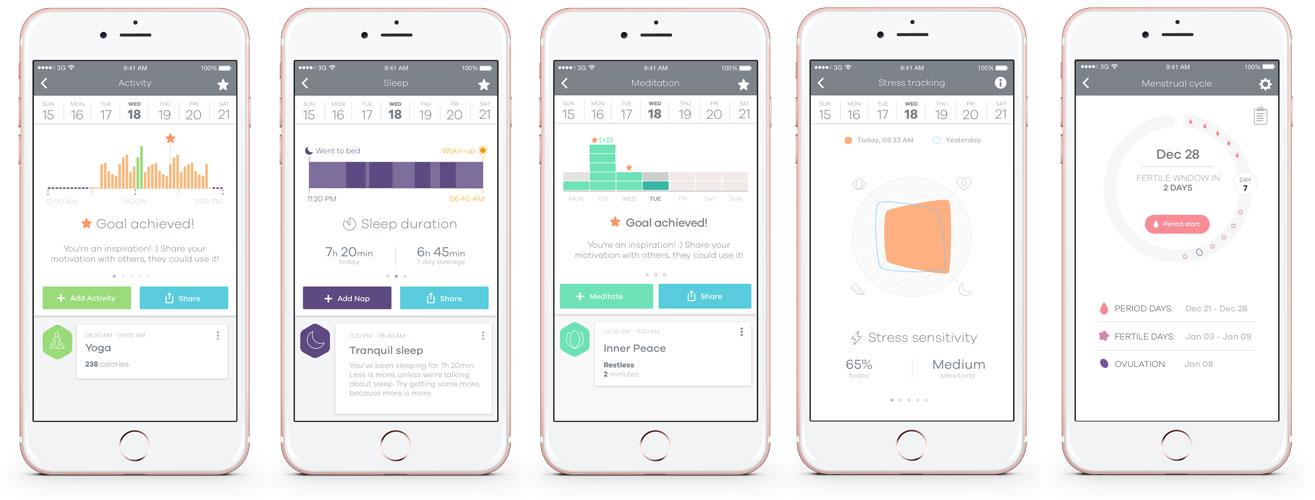
    
##### Recommendations for Improved Data Accuracy
For more accurate results, it would be beneficial to have a larger sample size with detailed demographic information such as gender, age, and economic status. A more representative sample size would better reflect Bellabeat's consumer base. Additionally, collecting data over a longer period would provide more insightful analysis, as wellness trends can fluctuate throughout the year. 

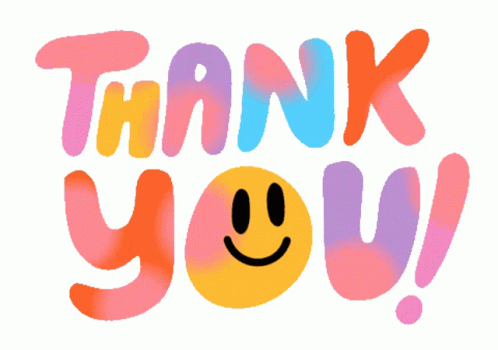